In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
type(train_images), type(test_images)

(numpy.ndarray, numpy.ndarray)

In [5]:
len(train_images), len(test_images)

(60000, 10000)

In [6]:
train_images.shape #image size: 28x28

(60000, 28, 28)

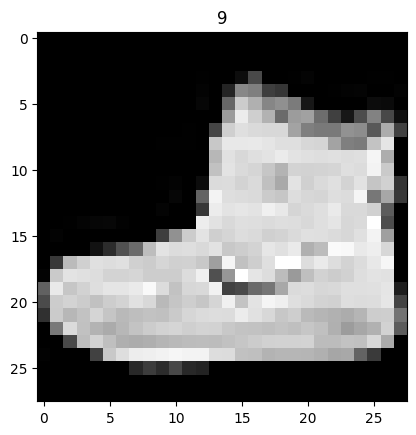

In [10]:
# prompt: display a image

plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.title(train_labels[0])
plt.show()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
# prompt: Scale the data

train_images = train_images / 255.0
test_images = test_images / 255.0


In [12]:
# prompt: shape of train_images

train_images[0].shape


(28, 28)

In [15]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [16]:
train_images[0].shape

(28, 28, 1)

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.4587 - accuracy: 0.8347 - val_loss: 0.3626 - val_accuracy: 0.8717
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3098 - accuracy: 0.8863 - val_loss: 0.3141 - val_accuracy: 0.8870
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2642 - accuracy: 0.9032 - val_loss: 0.2999 - val_accuracy: 0.8926
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2323 - accuracy: 0.9141 - val_loss: 0.2643 - val_accuracy: 0.9041
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2081 - accuracy: 0.9218 - val_loss: 0.2761 - val_accuracy: 0.8995
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1878 - accuracy: 0.9306 - val_loss: 0.2574 - val_accuracy: 0.9054
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1702 - accuracy: 0.9366 - val_loss: 0.2750 - val_accuracy

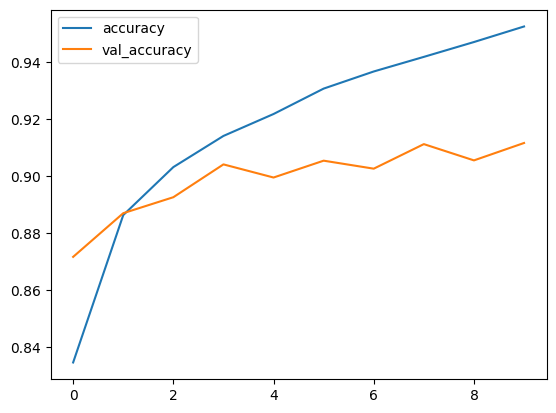

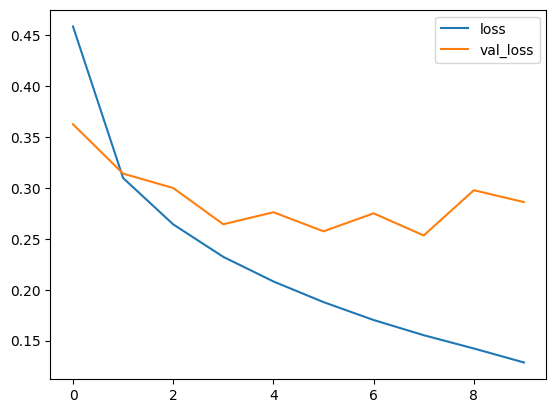

313/313 - 1s - loss: 0.2861 - accuracy: 0.9116 - 587ms/epoch - 2ms/step
0.9115999937057495


In [17]:
# prompt: Build CNN

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)


In [18]:
# prompt: save the model

model.save('fashion_mnist_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
from tensorflow.keras.models import load_model

loaded_model = load_model('fashion_mnist_model.h5')

In [20]:
# prompt: evaluate loaded model

test_loss, test_acc = loaded_model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)


313/313 - 1s - loss: 0.2861 - accuracy: 0.9116 - 1s/epoch - 3ms/step
0.9115999937057495
